In [5]:
library (dplyr)
library(twitteR)
setup_twitter_oauth("dIhjRcszok2R3LyK0VgYSded8","IxujimHa6JJcWS8mzfC57i9GbgQSc7qst49Fvqu0aglyuykecQ","2493349752-ao5qcIqhAga9jdk2N6RJTxeRIuQXaFwRk9RUhRb","T0sYiVKJQsYRShQopO1Kvqwbr7Bx0Ky3DXs8kdRuxEUTZ")
tweets<-searchTwitter('gameofthrones',n=5000)
df_2<-twListToDF(tweets)

[1] "Using direct authentication"


In [35]:
write.csv(df_2,file='data_2.csv')

In [10]:
dim(df_2)
tweet_text<-df_2$text

[1] 5000   16

In [11]:
new_tweet<-paste(tweet_text, collapse=" ")
dft = gsub("&amp", "", new_tweet)
dft = gsub("(RT|via)((?:\\b\\W*@\\w+)+)", "", dft)
dft = gsub("@\\w+", "", dft)
dft = gsub("[[:punct:]]", "", dft)
dft = gsub("[[:digit:]]", "", dft)
dft = gsub("http\\w+", "", dft)
dft = gsub("https\\w+", "", dft)
dft = gsub("[ \t]{2,}", "", dft)
dft = gsub("^\\s+|\\s+$", "", dft) 
dft=gsub("[^[:alnum:]///' ]", "", dft)
dft=gsub("[^0-9A-Za-z///' ]", "", dft)
dft<-gsub("#","",dft)

In [37]:
library('tm')
documents <- Corpus(VectorSource(dft))
documents = tm_map(documents, content_transformer(tolower))
documents = tm_map(documents, removeWords, stopwords("english"))

In [40]:
dataframe <- data.frame(text=sapply(documents, identity), 
    stringsAsFactors=F)

In [42]:
write.csv(dataframe,'data_stp.csv')

In [13]:
write.csv(dft,file='data_got.csv')

In [17]:
op<-read.csv('op_got.csv')

In [23]:
head(op)
class

X,x.1
De,1
A,27
ABSOLUTELY,5
ABSTINENCIA,1
AClashOfKings,1
ADanceWithDragons,1


In [47]:
library('wordcloud')
#install.packages('RColorBrewer',repos="https://cran.r-project.org/")
library('RColorBrewer')

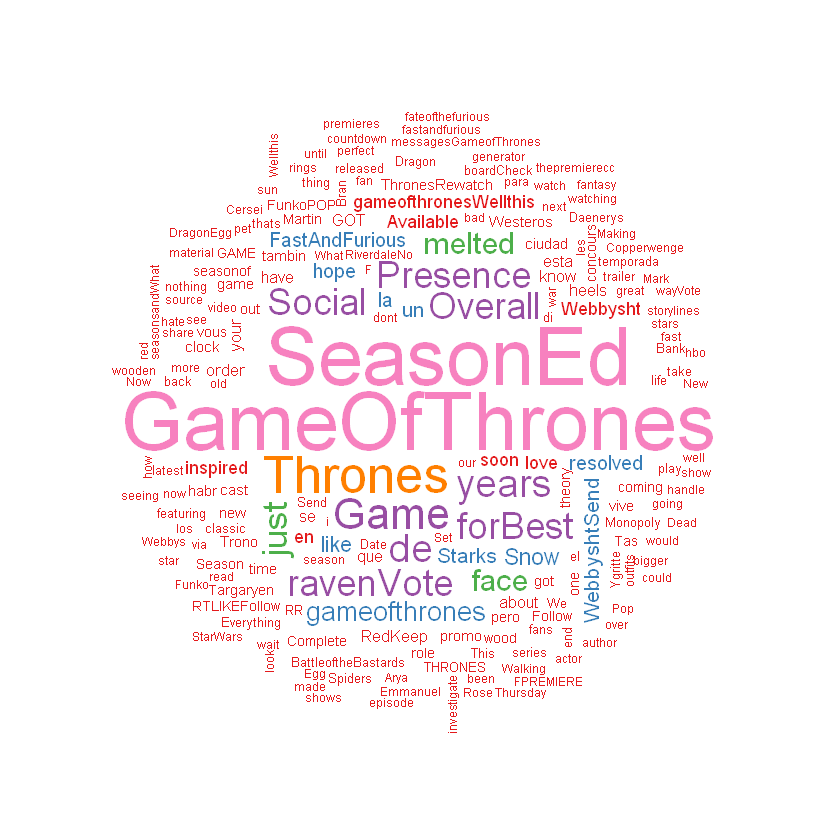

In [90]:
op<-read.csv('op_got.csv')
op_1<-op$X
op_2<-op$x.1
wordcloud(op_1, op_2,max.words = 200,random.order=FALSE,colors=brewer.pal(8, "Set1"))

In [86]:
op <- read.csv("stp.csv")

In [87]:
op_1<-op$X
op_2<-op$X1

In [88]:
op_1<-as.character(op_1)
op_2<-as.numeric(as.character(op_2))

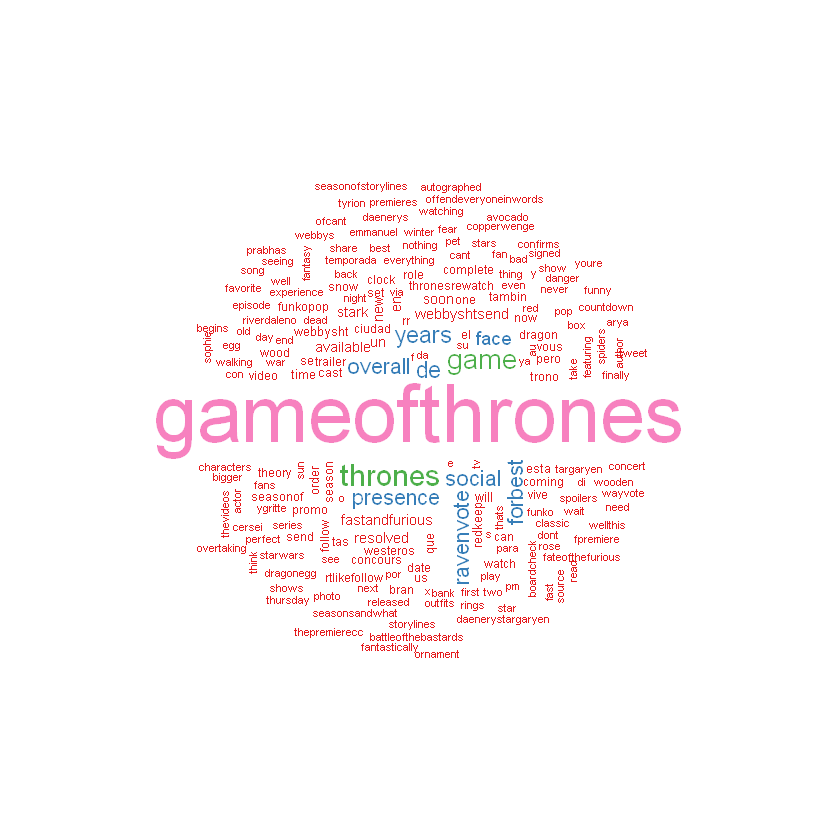

In [89]:
wordcloud(op_1,op_2,max.words = 200,random.order=FALSE,colors=brewer.pal(8, "Set1"))
